# Aplicaciones de Inteligencia Artificial
En esta sesión vamos a ver como podemos emplear modelos ya entrenados para hacer inferencia directamente sobre nuestras propias imágenes.

En ciertas ocasiones podemos encontrar un modelo que ya resuelva la tarea en la que estemos interesados.

Últimamente, [HuggingFace](https://huggingface.co/) se ha convertido en la plataforma en la que desarrolladores comparten sus modelos ya entrenados. En esta podemos encontrar modelos ya entrenados para resolver múltiples tareas.
En esta sesión nos vamos a centrar en modelos disponibles para resolver problemas de visión por computador.

En primer lugar vamos a instalar las dependencias necesarias.

In [1]:
# Dependencias que vamos a emplear a lo largo del notebook
from transformers import pipeline
from diffusers import StableDiffusionInstructPix2PixPipeline
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.patches as mpatches
import matplotlib.patches as patches
import numpy as np
import requests

## Clasificación

En primer lugar vamos a emplear modelos de clasificación ya entrenados con diferentes objetivos.

En concreto, vamos a probar un modelo de clasificación de platos de comida y otro de sentimiento en función de la expresión de la cara.

1. Clasificación de comida: https://huggingface.co/nateraw/food, entrenado con el dataset [Food-101](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/), el cual contiene 101 clases de diferentes tipos de comida.

2. Clasificación de expresión facial: https://huggingface.co/trpakov/vit-face-expression. Este clasifica una imagen de una cara en 5 categorías: miedo (fear), triste (sad), contento (happy), sorprendido (surprise) y neutral.

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


[{'score': 0.9970397353172302, 'label': 'paella'}, {'score': 0.00012844946468248963, 'label': 'risotto'}, {'score': 8.396828343393281e-05, 'label': 'fried_rice'}, {'score': 7.545468542957678e-05, 'label': 'bibimbap'}, {'score': 7.277091935975477e-05, 'label': 'mussels'}]


Text(0.5, 1.0, 'paella: 1.0')

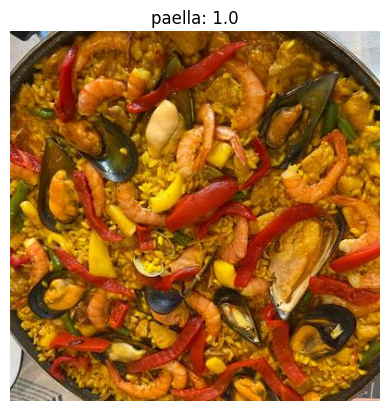

In [40]:
# Descargamos el modelo que nos interesa
classifier = pipeline("image-classification", model="nateraw/food")

# Cargamos la imagen
url = 'https://img-global.cpcdn.com/recipes/c47fd0220017c1c0/400x400cq70/photo.jpg'
# url = 'https://www.elespectador.com/resizer/dPgZgbfyzCh4nTG0dTvs4ho2EEg=/525x350/filters:quality(60):format(jpeg)/cloudfront-us-east-1.images.arcpublishing.com/elespectador/CZT2L7SIH5H3RJ5DH5JE2QHHVE.jpg'
#url = 'https://images.hola.com/imagenes/cocina/recetas/20190911149183/pizza-margarita/0-717-935/pizza-t.jpg'
#url = 'https://www.annarecetasfaciles.com/files/miniatura-58-1536x862.jpg'
image = Image.open(requests.get(url, stream=True).raw)

# Clasificamos imagen con modelo pre-entrenado
result = classifier(image)
print(result)

# Mostramos imagen
plt.imshow(image)
plt.axis('off')
# Nos quedamos con el primer resultado ya que es el de más probabilidad
# Mostramos en el título de la imagen la etiqueta y la probabilidad correspondiente
plt.title(f"{result[0]['label']}: {np.round(result[0]['score'], 2)}")

config.json:   0%|          | 0.00/915 [00:00<?, ?B/s]

C:\Python311\Lib\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\jsanchez\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/343M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


[{'score': 0.8820223808288574, 'label': 'angry'}, {'score': 0.05402400344610214, 'label': 'happy'}, {'score': 0.04549001529812813, 'label': 'fear'}, {'score': 0.01340841967612505, 'label': 'surprise'}, {'score': 0.0020851262379437685, 'label': 'neutral'}]


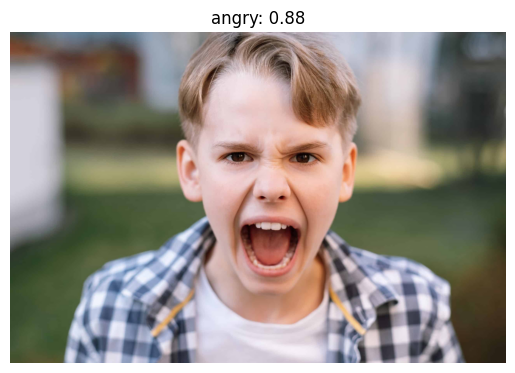

In [3]:
# Descargamos el modelo que nos interesa
classifier = pipeline("image-classification", model="trpakov/vit-face-expression")

# Cargamos la imagen
#url = 'https://get.pxhere.com/photo/women-depression-sad-portrait-face-human-nose-chin-lip-eye-wrinkle-sky-mouth-photography-hand-portrait-photography-thinking-gesture-happy-1624569.png'
#url = 'https://as1.ftcdn.net/v2/jpg/02/43/11/76/1000_F_243117659_eNEhNakRBBdwMIJo1y0XF3TFahMVdvT8.jpg'
#url = 'https://media.gettyimages.com/id/1470575724/es/foto/joven-mirando-con-asombro.jpg?s=1024x1024&w=gi&k=20&c=hIbXZ_QDtz1eyv9bFSGmLwU82nYed1y4yjRzQy_chok='
url = 'https://parents.app/wp-content/uploads/2023/07/boy-anger-issues-scaled.jpg'
image = Image.open(requests.get(url, stream=True).raw)

# Clasificamos imagen con modelo pre-entrenado
result = classifier(image)
plt.imshow(image)
plt.axis('off')
plt.title(f"{result[0]['label']}: {np.round(result[0]['score'], 2)}")
print(result)

# Segmentación

Vamos a ver un ejemplo de segmentación.
Para ello vamos a emplear el siguiente modelo: https://huggingface.co/facebook/mask2former-swin-base-coco-panoptic

Este implementa un modelo de segmentación entrenado con la [base de datos de COCO](https://cocodataset.org/#home).

In [ ]:
# Descargamos el modelo
pipe = pipeline("image-segmentation", model="facebook/mask2former-swin-base-coco-panoptic")

# Segmentamos una imagen
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
#url = 'https://hips.hearstapps.com/hmg-prod/images/cute-baby-animals-1558535060.jpg'
#url = 'https://news.airbnb.com/wp-content/uploads/sites/4/2023/10/IGLTA_Airbnb_latinamerica.jpg'
image = Image.open(requests.get(url, stream=True).raw)
result = pipe(image)

print(result)

`label_ids_to_fuse` unset. No instance will be fused.


[{'score': 0.998756, 'label': 'cat', 'mask': <PIL.Image.Image image mode=L size=640x480 at 0x7E9E0C198F10>}, {'score': 0.997873, 'label': 'cat', 'mask': <PIL.Image.Image image mode=L size=640x480 at 0x7E9E037DC280>}, {'score': 0.997116, 'label': 'remote', 'mask': <PIL.Image.Image image mode=L size=640x480 at 0x7E9E0B4146A0>}, {'score': 0.974273, 'label': 'remote', 'mask': <PIL.Image.Image image mode=L size=640x480 at 0x7E9E0B414D30>}, {'score': 0.956032, 'label': 'couch', 'mask': <PIL.Image.Image image mode=L size=640x480 at 0x7E9E0B414850>}]


Si observamos el resultados vemos que se trata de un array donde se encuentran los distintos objetos segmentados. Para cada objeto tenemos tres salidas:
- score: probabilidad de que el objeto segmentado sea la clase identficada.
- label: clase identificada
- mask: máscara binaria correspondiente al objeto segmentado

Finalmente, vamos a generar una única imagen con todas las segmentaciones:

<ipython-input-6-116ce9bfd369>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis', len(result))


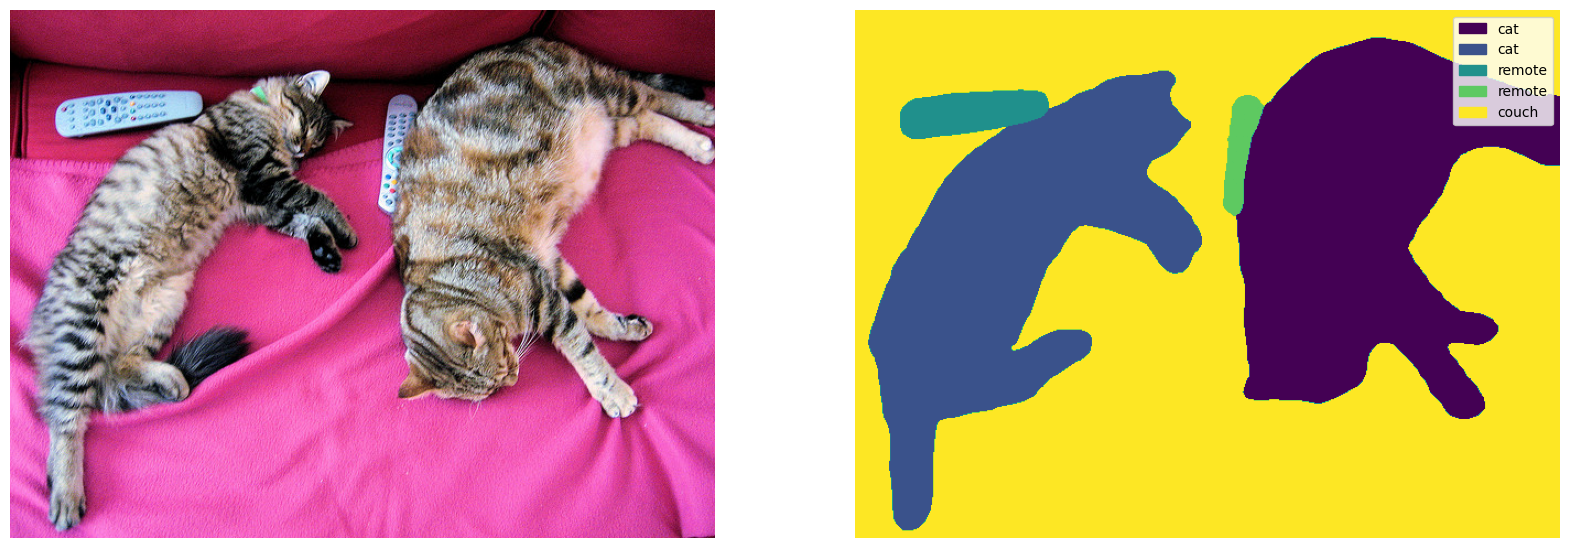

In [ ]:
# Cogemos el colormap que nos interesa para generar la leyenda.
# Especificamos el nombre del colormap y el valor máximo de objetos que vamos a mostrar
viridis = cm.get_cmap('viridis', len(result))

# Inicializamos la máscara con valores 0.
whole_mask = np.zeros(shape=(image.height, image.width)).astype('uint8')
handles = []
label = 0
# Para cada resultado
for res in result:
    # Convertimos la máscara de imagen de PIL a matriz de numpy
    mask = np.array(res['mask'])
    # En la máscara total, asignamos la etiqueta correspondiente a los pixeles segmentados
    whole_mask[mask == 255] = label
    # Cogemos el color correspondiente en el colormap
    color = viridis(label)
    # Creamos la leyenda con color y nombre de la etiqueta
    handles.append(mpatches.Patch(color=color, label=res['label']))
    label += 1

# Visualizamos la máscara resultante
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(whole_mask)
plt.axis('off')
plt.legend(handles=handles)

# Detección de objetos

Finalmente, vamos a ver un ejemplo de detección de objetos. Vamos a emplear dos modelos de manera secuencial. Un primer modelo que identifica la posición de un tabla dentro de una imagen (https://huggingface.co/microsoft/table-transformer-detection) y, uno segundo que, dentro de esta, identifica las filas y las columnas (https://huggingface.co/microsoft/table-transformer-structure-recognition).

Para mejorar el rendimiento de este segundo modelo vamos a recortar la zona de la imagen donde hemos identificado la tabla en el primero modelo y esta, se la pasaremos al segundo modelo.

In [ ]:
pipe = pipeline("object-detection", model="microsoft/table-transformer-detection")

#url = 'https://d33v4339jhl8k0.cloudfront.net/docs/assets/588089eddd8c8e484b24e90a/images/5abb8a9f2c7d3a0e9366cf52/file-qnmvTT5yso.png'
#url = 'https://s16458.pcdn.co/wp-content/uploads/2017/01/img_tp_4_1.png'
url = 'https://anotherreeshu.files.wordpress.com/2019/07/pdffile.png'
image = Image.open(requests.get(url, stream=True).raw)
result = pipe(image)

print(result)

Some weights of the model checkpoint at microsoft/table-transformer-detection were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


[{'score': 0.9995410442352295, 'label': 'table', 'box': {'xmin': 231, 'ymin': 336, 'xmax': 653, 'ymax': 484}}]


Vemos que como salida el modelo nos devuelve un array por tabla encontrada. Para cada tabla (identificada con la etiqueta 'table'), tenemos la probabilidad de que dicho objeto sea una tabla ('score') y las coordinadas de la misma.

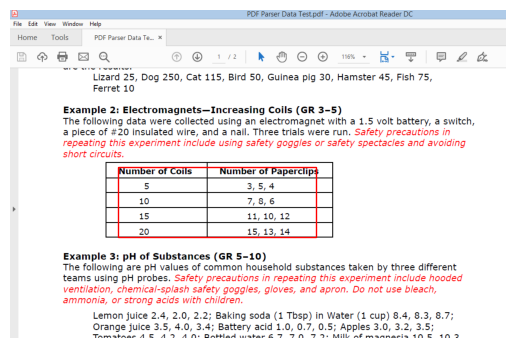

In [ ]:
fig, ax = plt.subplots(1)

# Mostramos imagen
ax.imshow(image)

# Para cada tabla encontrada, dibujamos un rectángulo alrededor
for res in result:
    bbox = res['box']
    # Creamos rectángulo. Los argumentos son (xmin, ymin), anchura, altura. Donde xmin e ymin son las coordenadas de la esquina superior izquierda
    rect = patches.Rectangle((bbox['xmin'], bbox['ymin']), bbox['xmax'] - bbox['xmin'], bbox['ymax'] - bbox['ymin'],
                             linewidth=1,
                             edgecolor='r', facecolor="none")

    # Add the patch to the Axes
    ax.add_patch(rect)
plt.axis('off')
plt.show()

(-0.5, 481.5, 207.5, -0.5)

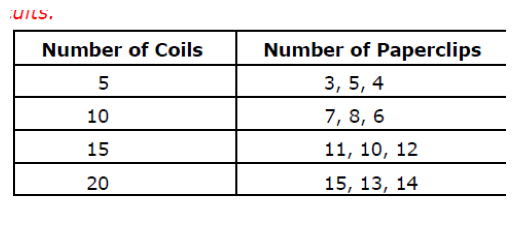

In [ ]:
image = np.array(image)
# Recortamos la imagen incluyendo únicamente la caja identificada
image_table = image[bbox['ymin'] - 30: bbox['ymax'] + 30, bbox['xmin'] - 30: bbox['xmax'] + 30]

plt.imshow(image_table)
plt.axis('off')

In [ ]:
pipe = pipeline("object-detection", model="microsoft/table-transformer-structure-recognition")

# Al segundo modelo le pasamos la imagen recortada
image_table = Image.fromarray(image_table)
result = pipe(image_table)

print(result)

Some weights of the model checkpoint at microsoft/table-transformer-structure-recognition were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


[{'score': 0.9974004030227661, 'label': 'table row', 'box': {'xmin': 29, 'ymin': 117, 'xmax': 456, 'ymax': 150}}, {'score': 0.9965150356292725, 'label': 'table row', 'box': {'xmin': 29, 'ymin': 54, 'xmax': 456, 'ymax': 85}}, {'score': 0.9997486472129822, 'label': 'table column', 'box': {'xmin': 29, 'ymin': 27, 'xmax': 215, 'ymax': 177}}, {'score': 0.9990264177322388, 'label': 'table row', 'box': {'xmin': 29, 'ymin': 86, 'xmax': 456, 'ymax': 117}}, {'score': 0.9994658827781677, 'label': 'table row', 'box': {'xmin': 29, 'ymin': 27, 'xmax': 456, 'ymax': 54}}, {'score': 0.9997933506965637, 'label': 'table column', 'box': {'xmin': 214, 'ymin': 27, 'xmax': 456, 'ymax': 177}}, {'score': 0.9936495423316956, 'label': 'table row', 'box': {'xmin': 29, 'ymin': 150, 'xmax': 456, 'ymax': 177}}, {'score': 0.988882839679718, 'label': 'table column header', 'box': {'xmin': 29, 'ymin': 27, 'xmax': 456, 'ymax': 53}}, {'score': 0.9998899698257446, 'label': 'table', 'box': {'xmin': 29, 'ymin': 27, 'xmax': 

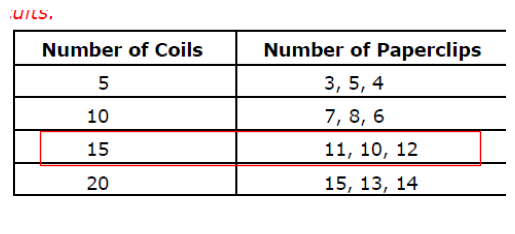

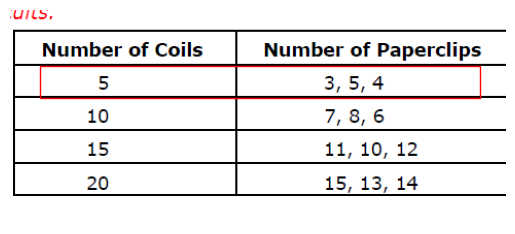

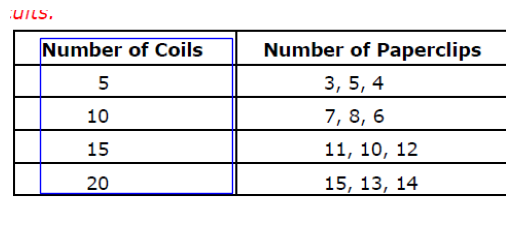

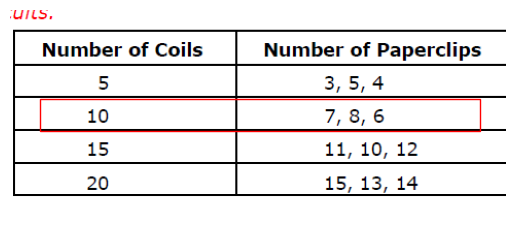

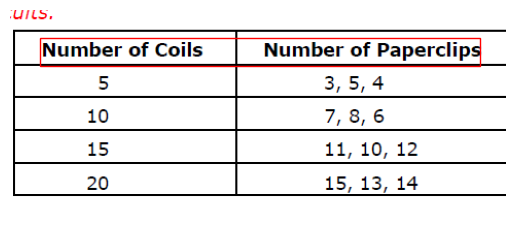

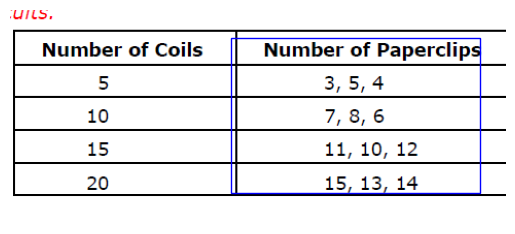

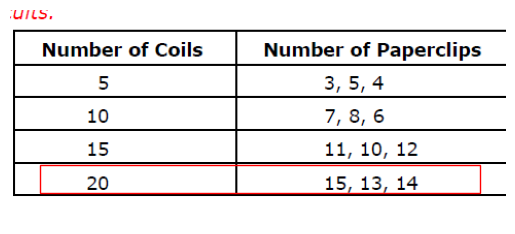

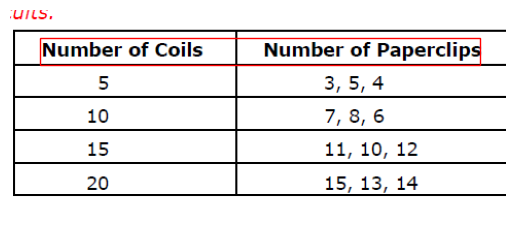

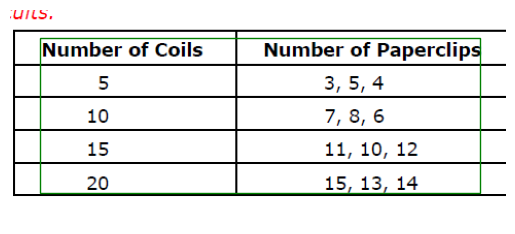

In [ ]:
# Display the image
for res in result:
    # Pintamos las filas, columnas y la tabla completa de colores diferentes
    if res['label'] == 'table row':
        color = 'r'
    elif res['label'] == 'table column':
        color = 'b'
    elif res['label'] == 'table':
        color = 'g'
    bbox = res['box']
    # Create a Rectangle patch
    rect = patches.Rectangle((bbox['xmin'], bbox['ymin']), bbox['xmax'] - bbox['xmin'], bbox['ymax'] - bbox['ymin'],
                             linewidth=1,
                             edgecolor=color, facecolor="none")

    fig, ax = plt.subplots(1)
    ax.imshow(image_table)
    # Add the patch to the Axes
    ax.add_patch(rect)
    plt.axis('off')
    plt.show()

# Generación de imagen

Finalmente vamos a ver un ejemplo de generación de imagen. Para esto se hace uso de la librería "diffusers" ya que se trata, generalmente, de modelos de difusión.

En concreto vamos a hacer uso de un modelo (https://huggingface.co/timbrooks/instruct-pix2pix) que, dada una imagen de entrada, permite incluir un prompt para hacer una variación de la misma.

In [50]:
pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained("timbrooks/instruct-pix2pix")

url = "https://raw.githubusercontent.com/timothybrooks/instruct-pix2pix/main/imgs/example.jpg"
image = Image.open(requests.get(url, stream=True).raw)

prompt = "turn him into a cartoon character with clothes on"
images = pipe(prompt, image=image, num_inference_steps=10, image_guidance_scale=1).images

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/10 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


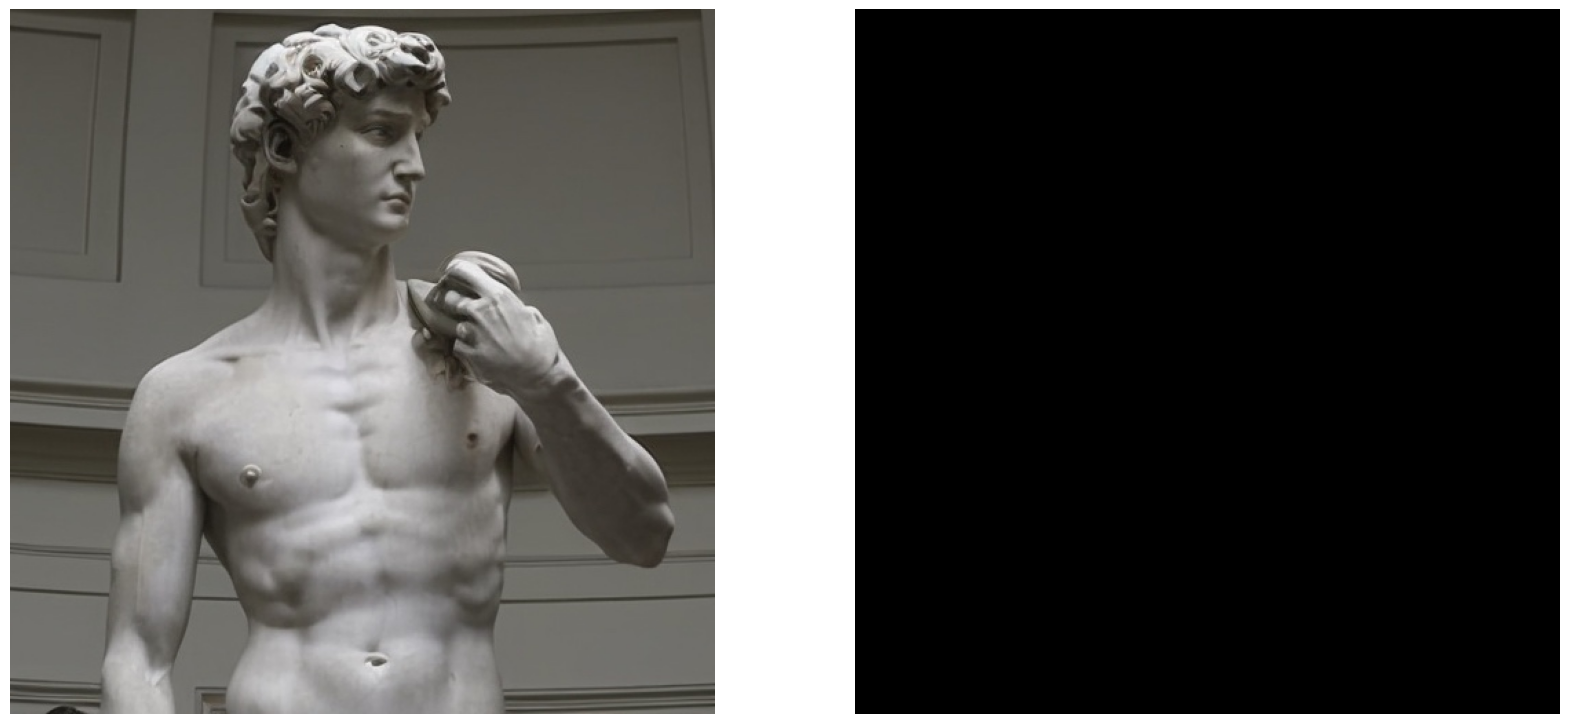

In [49]:
# Mostramos la imagen original y la generada
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(images[0])
plt.axis('off')
plt.show()

In [ ]:
# Descargamos el modelo que nos interesa
classifier = pipeline("image-classification", model="nateraw/food")

# Cargamos la imagen
url = 'https://img-global.cpcdn.com/recipes/c47fd0220017c1c0/400x400cq70/photo.jpg'
# url = 'https://www.elespectador.com/resizer/dPgZgbfyzCh4nTG0dTvs4ho2EEg=/525x350/filters:quality(60):format(jpeg)/cloudfront-us-east-1.images.arcpublishing.com/elespectador/CZT2L7SIH5H3RJ5DH5JE2QHHVE.jpg'
#url = 'https://images.hola.com/imagenes/cocina/recetas/20190911149183/pizza-margarita/0-717-935/pizza-t.jpg'
#url = 'https://www.annarecetasfaciles.com/files/miniatura-58-1536x862.jpg'
image = Image.open(requests.get(url, stream=True).raw)

# Clasificamos imagen con modelo pre-entrenado
result = classifier(image)
print(result)

# Mostramos imagen
plt.imshow(image)
plt.axis('off')
# Nos quedamos con el primer resultado, ya que es el de más probabilidad
# Mostramos en el título de la imagen la etiqueta y la probabilidad correspondiente
plt.title(f"{result[0]['label']}: {np.round(result[0]['score'], 2)}")

In [45]:
from torch import nn

#Image classifier

pipe = pipeline("image-segmentation", model="mattmdjaga/segformer_b2_clothes")

# url = 'https://image.shutterstock.com/image-photo/beautiful-colorful-clothes-flying-isolatedwomens-260nw-2257875171.jpg'
# url = 'https://content.woolovers.com/img/747x856/62512_p154m_marinablue_m_15.jpg'
url = 'https://i.pinimg.com/736x/b0/6b/bc/b06bbc50f30b91a30d9a795ceb2a8571.jpg'
# url = 'https://img.allw.mn/content/n1/ie/pf38kic554e385abf22e2113644449_600x873.jpg'
# url = 'https://i.pinimg.com/1200x/ed/c5/f9/edc5f913c3c229e2b51794929e05d20a.jpg'
# url = 'https://upload.wikimedia.org/wikipedia/commons/5/50/Jacques-Louis_David_-_The_Emperor_Napoleon_in_His_Study_at_the_Tuileries_-_Google_Art_Project.jpg'
# url = 'https://static.wikia.nocookie.net/onepiece/images/a/af/Monkey_D._Luffy_Anime_Dos_A%C3%B1os_Despu%C3%A9s_Infobox.png/revision/latest?cb=20200616015904&path-prefix=es'

image = Image.open(requests.get(url, stream=True).raw)

result = pipe(image)

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


C:\Users\jsanchez\AppData\Local\Temp\ipykernel_5092\112020210.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis', len(result))


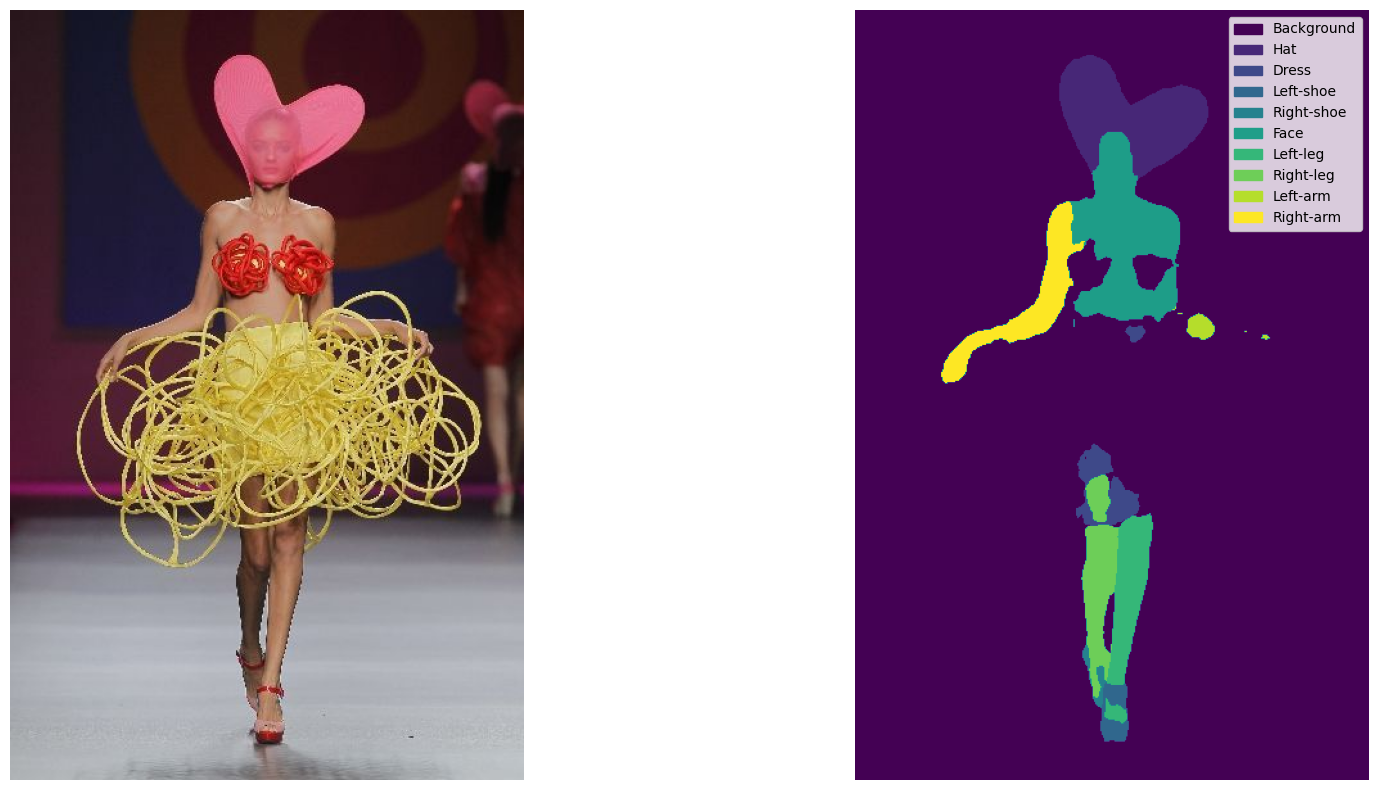

In [46]:
# Cogemos el colormap que nos interesa para generar la leyenda.
# Especificamos el nombre del colormap y el valor máximo de objetos que vamos a mostrar
viridis = cm.get_cmap('viridis', len(result))

# Inicializamos la máscara con valores 0.
whole_mask = np.zeros(shape=(image.height, image.width)).astype('uint8')
handles = []
label = 0
# Para cada resultado
for res in result:
    # Convertimos laa máscara de imagen de PIL a matriz de numpy
    mask = np.array(res['mask'])
    # En la máscara total, asignamos la etiqueta correspondiente a los pixeles segmentados
    whole_mask[mask == 255] = label
    # Cogemos el color correspondiente en el colormap
    color = viridis(label)
    # Creamos la leyenda con color y nombre de la etiqueta
    handles.append(mpatches.Patch(color=color, label=res['label']))
    label += 1

# Visualizamos la máscara resultante
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(whole_mask)
plt.axis('off')
plt.legend(handles=handles)